In [9]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from util import load_json,normalization,body_drawing

## 1. Json Load

In [10]:
adress_raw_data = load_json('./dataset/address.json')
not_adress_raw_data = load_json('./dataset/not_address.json')

In [46]:
# Load Json 데이터
label = []
address_keypoints = []
not_address_keypoints = []

for address in adress_raw_data:
    label.append(address['label'])
    address_keypoints.append(address['keypoints'])

for not_address in not_adress_raw_data:
    label.append(not_address['label'])
    not_address_keypoints.append(not_address['keypoints'])


address_keypoints = np.array(address_keypoints) # (136,17,2) ->  인풋
not_address_keypoints = np.array(not_address_keypoints) # (200,17,2) -> 인풋
label = np.array(label) # (336,) -> 아웃풋
 
print(address_keypoints.shape)
print(not_address_keypoints.shape)
print(label.shape)

(136, 17, 2)
(200, 17, 2)
(336,)


## 2. Normalization

<img src="./explain_img/image.png" width="500" height="500">

**util.py에서 normalization함수 참고**

In [24]:
address_normalized_keypoints = normalization(address_keypoints)
not_address_normalized_keypoints = normalization(not_address_keypoints)
print(address_normalized_keypoints.shape)
print(not_address_normalized_keypoints.shape)

(136, 17, 2)
(200, 17, 2)


#### 시각화

Text(0.5, 1.0, 'normalized')

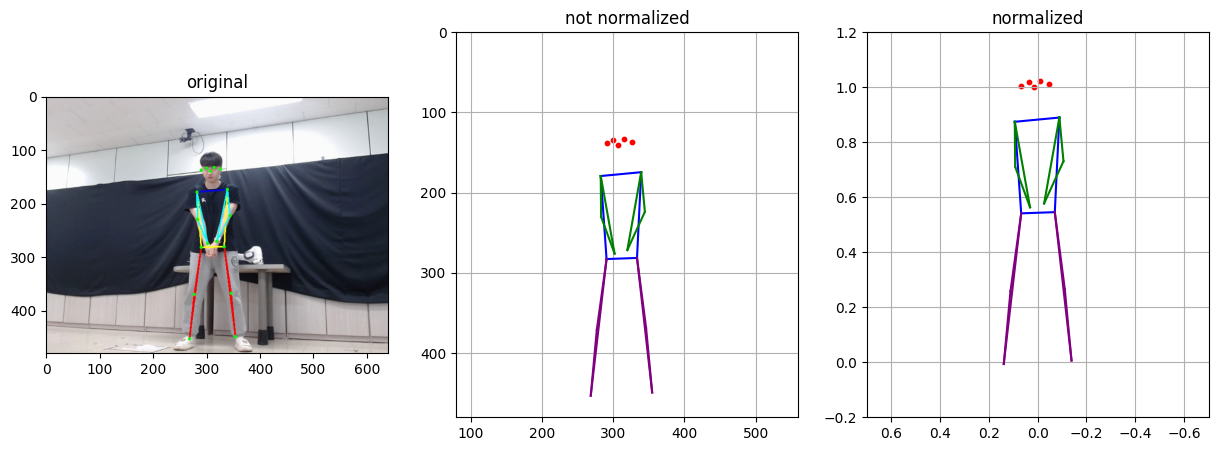

In [42]:
# load jpg
address_img = plt.imread('./dataset/img/address/0.jpg')

# Address
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(address_img)
plt.title('original')

plt.subplot(1,3,2)
body_drawing(address_keypoints[0])
plt.xlim(80,560)
plt.ylim(480,0)
plt.title('not normalized')

plt.subplot(1,3,3)
body_drawing(address_normalized_keypoints[0])
plt.xlim(0.7, -0.7)
plt.ylim(-0.2, 1.2)
plt.title('normalized')


Text(0.5, 1.0, 'normalized')

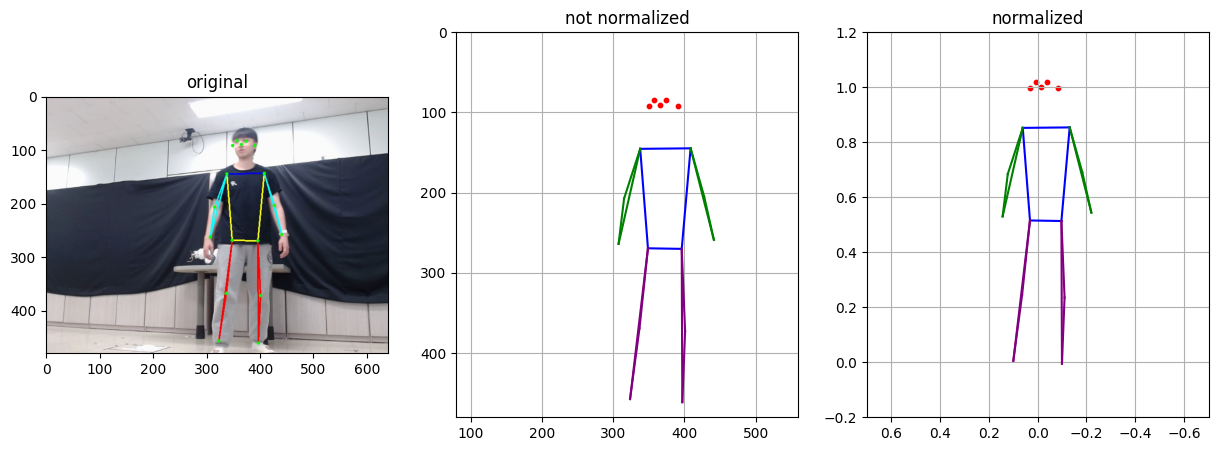

In [43]:
# load jpg
not_address_img = plt.imread('./dataset/img/not_address/0.jpg')

# Not Address
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(not_address_img)
plt.title('original')

plt.subplot(1,3,2)
body_drawing(not_address_keypoints[0])
plt.xlim(80,560)
plt.ylim(480,0)
plt.title('not normalized')

plt.subplot(1,3,3)
body_drawing(not_address_normalized_keypoints[0])
plt.xlim(0.7, -0.7)
plt.ylim(-0.2, 1.2)
plt.title('normalized')

## Start Training


***

학습을 시킬때는 보통 같은 절차를 거침

1. 데이터수집
2. 데이터 전처리
3. 모델링
4. 학습
5. 평가


***

현재 1,2번은 이미 다 했다고 가정 <br>
(데이터 셋이 큰경우에는 데이터를 한번에 로딩하는게 불가능해서 학습하면서 전처리가 이루어지지만, <br>
지금은 간단한 데이터셋이라 한번에 데이터를 로딩할 수 있어서 처음부터 전처리를 해놓은 것이라고 생각하면 됨)


***

모델은,
[./참조](./참조/) 경로에 .ipynb 파일안에 구현되어있는 모델들을 따라서 구현해보면 되는데, <br>
- scikit-learn을 이용한 머신러닝 모델 2~3개
- pytorch를 이용한 딥러닝 모델 Multi Layer Perceptron   

을 구현해보기.

***

이후 평가에 대한 내용은
- Confusion Matrix
- Accuracy
- Precision
- Recall

이렇게 4가지를 구현해보면 됨

In [53]:
x = np.concatenate((address_normalized_keypoints, not_address_normalized_keypoints), axis=0)
y = np.array(label)

print(x.shape)
print(y.shape)

(336, 17, 2)
(336,)


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.1, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(302, 17, 2)
(34, 17, 2)
(302,)
(34,)


In [52]:
## Code Here ##